# VecLib

A Python library for playing with and visualizing vectors in Jupyter notebooks. For personal learning purposes.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Roadmap

- <s>Addition and subtraction</s>
- <s>Scaling (multiplication)</s>
- <s>Visualizing in 2D</s>
- <s>Visualizing in 3D</s>
- Visualization legends
- Visualize dot products as projections
- Compute determinant
- Cross products

In [169]:
class Vector():
    """The base class for all vector operations"""
    
    def __init__(self, arr, base=np.array([1, 1])):
        self._arr = arr
        self.base = base
    
    def dot(self, other):
        return np.dot(self._arr, other._arr)

    def cross(self, other):
        return Vector(np.cross(self._arr, other._arr))
    
    def plot(self, ax=None):
        dims = len(self._arr)
        if dims > 3:
            raise Exception('Cannot plot over 3 dimensions')
        if not ax:
            fig = plt.figure()
            proj = '3d' if dims == 3 else None
            ax = fig.add_subplot(111, projection=proj)
        if dims == 1:
            self._plot1d(ax)
        elif dims == 2:
            self._plot2d(ax)
        elif dims == 3:
            self._plot3d(ax)
            
    def _plot2d(self, ax):
        x, y = self._arr
        ax.plot([0, x], [0, y])
        
    def _plot2d_quiver(self, ax):
        """Work in progress."""
        x, y = self._arr
        ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)
        xmin = 0 if x >= 0 else x
        xmax = 0 if x <= 0 else x
        ymin = 0 if y >= 0 else y
        ymax = 0 if y <= 0 else y
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        return ax
        
    def _plot3d(self, ax):
        x, y, z = self._arr
        ax.plot([0, x], [0, y], [0, z])

    def __add__(self, other):
        return Vector(self._arr + other._arr)

    def __sub__(self, other):
        return Vector(self._arr - other._arr)

    def __mul__(self, scalar):
        return self._arr * scalar
    
    def __eq__(self, other):
        return np.all(self._arr == other._arr)
    
    def __repr__(self):
        return 'vector({})'.format([x for x in self._arr])

## Basic plots

### Plotting single vector in 2D

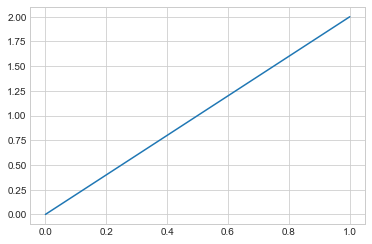

In [128]:
v1 = Vector(np.array([1,2]))
v1.plot()

### Plotting multiple vectors in 2D

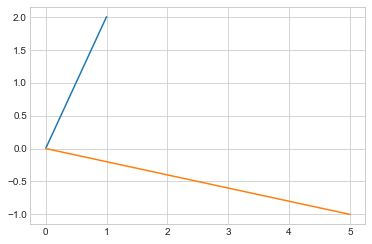

In [115]:
fig, ax = plt.subplots()
v1 = Vector(np.array([1,2]))
v2 = Vector(np.array([5,-1]))
v1.plot(ax)
v2.plot(ax)

### Plotting vectors in 3D

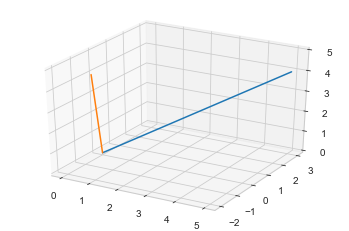

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
v1 = Vector(np.array([5,3,4]))
v2 = Vector(np.array([1,-2,5]))
v1.plot(ax)
v2.plot(ax)

## Operations

### Dot product

In [172]:
v1 = Vector(np.array([1,3]))
v2 = Vector(np.array([2,1]))
v1.dot(v2)

5

### Cross product

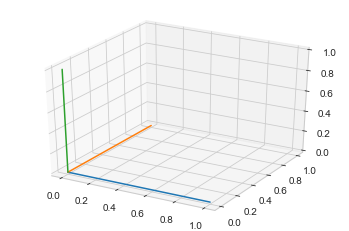

In [139]:
v1 = Vector(np.array([1,0,0]))
v2 = Vector(np.array([0,1,0]))
v3 = v1.cross(v2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v1.plot(ax)
v2.plot(ax)
v3.plot(ax)